In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
## Constants
G = 6.6743 * 1e-11 # Gravitational constant
M_Sun = 1.9885 * 1e30 # mass of the Sun in kg (from NASA)
R_earth = 6.371 * 1e6 # average radius of the earth in meters (from Wikipedia)
cm_to_m = 1e-2 # cm to m conversion
m_to_km = 0.001 # m to km conversion
c = 299792458 # speed of light m/s
from scipy.integrate import solve_ivp
pi = np.pi
K_NS = 100
length_scale = G * M_Sun / np.power(c,2)

Implementation for Einstein Part(B)

In [97]:
def solve_ivp_TOV(p_c):
    ## function explanation
    p_tolerance = 1e-10 # tolerance to how far p is from 0 -- integration limit
    r_bound =100
    
    def TOV_rhs(r, current_state):
        next_state = np.zeros_like(current_state) # initialize the next state to be returned
        ## extract the state information from the corresponding vector state vector elements
        m = current_state[0]
        v = current_state[1]
        p = current_state[2]
        rho = np.sqrt(p/K_NS) # given relation between rho and p_c

        next_state[0] = 4 * pi * np.power(r,2) * rho
        ## handle where the denominator is 0 (that case next_state is all zeros)
        if(not (r == 0)):  
            ## calculate the derivatives from the provided equations
            dv = 2 * ((m + 4 * pi * np.power(r,3) * p) / (r * (r - 2*m)))
            dp = (-1/2) * (rho + p) * v
            next_state[1] = dv
            next_state[2] = dp
        return next_state

    def stop_condition(r, current_state):
        p = current_state[2] 
        return np.abs(p) < p_tolerance # Stop when p is close to zero
    
    initial_conditions = np.asarray([0, 0, p_c]).astype(float)
    result = solve_ivp(TOV_rhs, t_span = [0, r_bound], y0=initial_conditions, events=stop_condition)
    final_r = result.t[-1]
    final_m = result.y[0,-1]
    
    return final_r, final_m


/var/folders/j2/_m2jcv351b1bl0wyjjwt_0jr0000gn/T/ipykernel_15302/2331196076.py:12: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(p/K_NS) # given relation between rho and p_c


1476.6919695142465


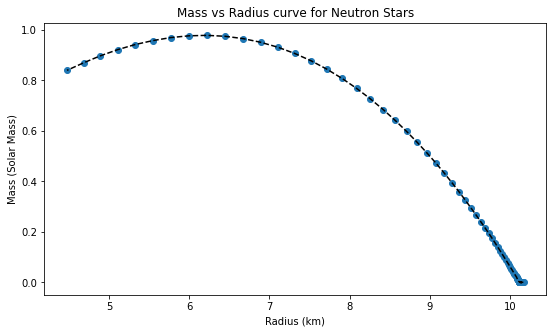

In [109]:
## Plot the M vs R by integrating TOV equations for difference p_c values
sample_size = 100

## Sample points -- I tried to set the range so that I get a similar plot to the ones online
rho_range = np.logspace(-7,-1.7, sample_size)
p_c_range = K_NS * np.power(rho_range, 2)

# To store the solutions for different p_c values
R_array = []
M_array = []
# Solve the initial value problem for different p_c values
for p_c in p_c_range:
    R, M = solve_ivp_TOV(p_c)
    R_array.append(R)
    M_array.append(M)

R_array = np.asarray(R_array)
M_array = np.asarray(M_array)

#Plot the result
print(length_scale)
plt.figure(figsize=(9,5))
plt.scatter(R_array*length_scale*m_to_km, M_array)
plt.plot(R_array*length_scale*m_to_km, M_array, linestyle='dashed',color = 'black')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.title("Mass vs Radius curve for Neutron Stars")
plt.show()

Implementation for Einstein Part(B)

In [110]:
def solve_ivp_TOV_Rest(p_c):
    ## function explanation
    p_tolerance = 1e-10 # tolerance to how far p is from 0 -- integration limit
    r_bound =100
    
    def TOV_rhs(r, current_state):
        next_state = np.zeros_like(current_state) # initialize the next state to be returned
        ## extract the state information from the corresponding vector state vector elements
        m = current_state[0]
        v = current_state[1]
        p = current_state[2]
        mp = current_state[3]
        rho = np.sqrt(p/K_NS) # given relation between rho and p_c

        next_state[0] = 4 * pi * np.power(r,2) * rho
        ## handle where the denominator is 0 (that case next_state is all zeros)
        if(not (r == 0)):  
            ## calculate the derivatives from the provided equations
            dv = 2 * ((m + 4 * pi * np.power(r,3) * p) / (r * (r - 2*m)))
            dp = (-1/2) * (rho + p) * v
            dmp = 4 * pi * np.power(1 - (2 * m) / r, (-1/2)) * np.power(r,2) * rho 
            next_state[1] = dv
            next_state[2] = dp
            next_state[3] = dmp
        return next_state

    def stop_condition(r, current_state):
        p = current_state[2] 
        return np.abs(p) < p_tolerance # Stop when p is close to zero
    
    initial_conditions = np.asarray([0, 0, p_c, 0]).astype(float)
    result = solve_ivp(TOV_rhs, t_span = [0, r_bound], y0=initial_conditions, events=stop_condition)
    final_r = result.t[-1]
    final_m = result.y[0,-1]
    final_mp = result.y[3,-1]
    
    return final_r, final_m, final_mp


/var/folders/j2/_m2jcv351b1bl0wyjjwt_0jr0000gn/T/ipykernel_15302/3923997965.py:13: RuntimeWarning: invalid value encountered in sqrt
  rho = np.sqrt(p/K_NS) # given relation between rho and p_c


1476.6919695142465


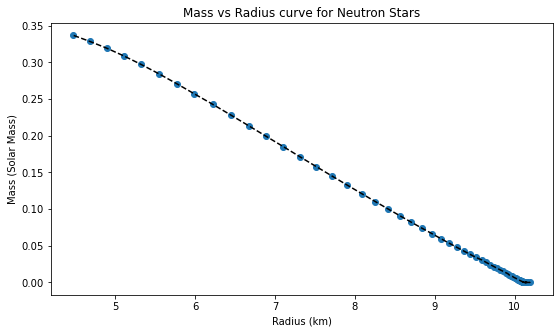

In [112]:
## Plot the Delta vs R by integrating TOV equations for difference p_c values
sample_size = 100

## Sample points -- I tried to set the range so that I get a similar plot to the ones online
rho_range = np.logspace(-7,-1.7, sample_size)
p_c_range = K_NS * np.power(rho_range, 2)

# To store the solutions for different p_c values
R_array = []
M_array = []
MP_array = []
# Solve the initial value problem for different p_c values
for p_c in p_c_range:
    R, M, MP = solve_ivp_TOV_Rest(p_c)
    R_array.append(R)
    M_array.append(M)
    MP_array.append(MP)

R_array = np.asarray(R_array)
M_array = np.asarray(M_array)
MP_array = np.asarray(MP_array)

delta = (MP_array - M_array)/M_array

#Plot the result
print(length_scale)
plt.figure(figsize=(9,5))
plt.scatter(R_array*length_scale*m_to_km, delta)
plt.plot(R_array*length_scale*m_to_km, delta, linestyle='dashed',color = 'black')
plt.xlabel('Radius (km)')
plt.ylabel('Mass (Solar Mass)')
plt.title("Mass vs Radius curve for Neutron Stars")
plt.show()

Implementation for Part(C)